# PRACTICA TIPOLOGIA DE DATOS. LIMPIEZA Y VALIDACION DE DATOS.


# MASTER DATA SCIENCE UOC UNIVERSITY

### DESCRIPCION DEL DATASET
#### ¿Por qué es importante y qué pregunta/problema pretende responder?

###### El dataset esta compuesto por un listado de coches usados provenientes de de un web scraping, las paginas de las que se obtuvo 
###### fueron www.carsdot.com y www.carsoup.com. Se recogen variables tales como marca, modelo, anyo de fabricacion, kilometraje, 
###### transmision, vendedor, localidad y motor.
###### El conjunto de datos pretende responder a la pregunta de si es posible predecir el precio de un coche usado en base a este
###### dataset en funcion de un modelo determinado.

### LIMPIEZA DE DATOS
##### ¿Cuáles son los campos más relevantes para responder al problema?
##### ¿Los datos contienen ceros o elementos vacíos? ¿Y valores extremos? ¿Cómo gestionarías cada uno de estos casos?

###### Los campos mas relevantes para responder a este problema son kilometraje, anyo de fabricacion, modelo y marca pero principalmente
###### los dos primeros. Los elementos vacios y los valores extremos se ven mas adelante asi como la forma de gestionarlos.

### ANALISIS DE LOS DATOS

###### Se ve en detalle mas adelante

### RESOLUCION DEL PROBLEMA
###### ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?

###### Se ven mas adelante las conclusiones que se sacan, los resultados y si el modelo aplicado permite responder al problema.

### REPRESENTACION DE LOS RESULTADOS A PARTIR DE TABLAS Y GRAFICAS 

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')
import seaborn as sb
import os
from shutil import copyfile
from datetime import datetime
import sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('C:/Users/darog/OneDrive/Documents/UOC/tipologia_ciclo_vida_datos/practica2/final_file.csv', index_col = False ,error_bad_lines = False)
df.head()

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
0,73531922,Toyota,Corolla-LE,2015,23036,13298,NaN,NaN,Chantilly,VA 20151,1.8 4 Cylinder Sequential-Port F.I.
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,AUTOMATIC,4WD,Baltimore,MD 21215,3.6L 6 CYL. GAS
2,73704666,Honda,Civic-LX,2014,27784,14097,Automatic,FWD,Ellicott City,MD 21043,1.80L I4
3,73566743,Jeep,Grand-Cherokee-Limited,2014,36636,27899,8-Speed Automatic,4WD,Palmyra,PA 17078,3.6L V6 Flex Fuel 24V VVT
4,73745994,Hyundai,Santa-Fe-Sport-24L,2013,48568,18981,A,AWD,Doylestown,PA 18902,2.40L I4


In [3]:
print 'Este dataset tiene:', df.shape[0], 'filas y', df.shape[1], 'columnas'

Este dataset tiene: 21142 filas y 11 columnas


In [4]:
# Los valores de transmision "automatic" estan representados por diferentes etiquetas: 'Automatic', '8-Speed Automatic' 'AUTOMATIC', 'A'. 
# Estandirecemos a uno solo: "Automatic"

In [5]:
# este diccionario transforma todas las etiquetas asociadas a car_transmission como una unica 

some_changes = {"car_transmission":   
                {"AUTO":"Automatic" , "8-Speed Automatic":"Automatic", "Automatic CVT":"Automatic", "AUTOMATIC": "Automatic",
                 "A": "Automatic" }}

df.replace(some_changes, inplace=True)
df.head()

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
0,73531922,Toyota,Corolla-LE,2015,23036,13298,NaN,NaN,Chantilly,VA 20151,1.8 4 Cylinder Sequential-Port F.I.
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,Automatic,4WD,Baltimore,MD 21215,3.6L 6 CYL. GAS
2,73704666,Honda,Civic-LX,2014,27784,14097,Automatic,FWD,Ellicott City,MD 21043,1.80L I4
3,73566743,Jeep,Grand-Cherokee-Limited,2014,36636,27899,Automatic,4WD,Palmyra,PA 17078,3.6L V6 Flex Fuel 24V VVT
4,73745994,Hyundai,Santa-Fe-Sport-24L,2013,48568,18981,Automatic,AWD,Doylestown,PA 18902,2.40L I4


### DUPLICADOS

In [6]:
# Veamos si existen duplicados
df.duplicated('car_id').sum()

2

In [7]:
# Veamos cuales son
df [df.duplicated(['car_id'], keep=False)]

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
20492,701805568,Ford,Escape,2016,33633,17293,6-Speed Automatic,4WD,Temple Hills,Temple Hills,NaN
20658,701805568,Ford,Escape,2016,33633,17790,6-Speed Automatic,4WD,Temple Hills,Temple Hills,NaN
20679,705830314,Chevrolet,Impala,2001,117241,24500,Automatic,FWD,Marlow Heights,Marlow Heights,NaN
20988,705830314,Chevrolet,Impala,2001,117241,24516,Automatic,FWD,Marlow Heights,Marlow Heights,NaN


In [8]:
# Podemos desprendernos de lso duplicados pues muestran distintos precios (aunque muy similares entre ellos)
df = df.drop_duplicates(subset=['car_id'], keep= False)
df.shape

(21138, 11)

### ELEMENTOS VACIOS

In [9]:
df.isnull().sum()

car_id                 0
car_make               0
car_model              0
car_year               0
car_mileage            0
car_price              0
car_transmission      18
car_driveTrain        32
car_vendor             0
car_location           0
car_engine          4782
dtype: int64

In [10]:
# Vemos que nuestro dataset tiene valores vacios para la transmission y para el cambio.
# Consideramos rellenarlos con los valores mas comunes, FWD para la transmisison y Automatic para el cambio

df['car_driveTrain'].fillna('FWD', inplace=True)
df['car_transmission'].fillna('Automatic', inplace=True)

In [11]:
df.isnull().sum()

car_id                 0
car_make               0
car_model              0
car_year               0
car_mileage            0
car_price              0
car_transmission       0
car_driveTrain         0
car_vendor             0
car_location           0
car_engine          4782
dtype: int64

In [12]:
# El motor del coche es un capitulo aparte, puesto que los datos vienen de un web scraping de paginas web de ventas de coches, 
# muchos propietarios no incluyen ese dato. Ademas el motor es un atributo que no sera utilizado en los analisis posteriores
# podemos por tanto, obviar el hecho de que existan 4782 valores vacios y deshacernos de ello

df = df.drop(['car_engine'], axis=1)
df.head()

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,Automatic,4WD,Baltimore,MD 21215
2,73704666,Honda,Civic-LX,2014,27784,14097,Automatic,FWD,Ellicott City,MD 21043
3,73566743,Jeep,Grand-Cherokee-Limited,2014,36636,27899,Automatic,4WD,Palmyra,PA 17078
4,73745994,Hyundai,Santa-Fe-Sport-24L,2013,48568,18981,Automatic,AWD,Doylestown,PA 18902


In [13]:
# Veamos lo que realmente contiene nuestro dataset por modelo de coche, veamos cuales son los modelos mas interesantes en 
# terminos de cuales tienen mas coches registrados
# Elegimos marcas con al menos 1000 vehiculos para poder aplicar test estadisticos con suficientes muestras

# Para ello definimos un nuevo dataframe llamado dfgroup

dfgroup = df.groupby('car_make').filter(lambda x: len(x) > 1000)
dfgroup.car_make.value_counts()

Ford         2211
Chevrolet    1800
Hyundai      1793
Toyota       1642
Honda        1589
Nissan       1323
Jeep         1117
BMW          1037
Name: car_make, dtype: int64

In [14]:
df.groupby('car_make').count()

,car_id,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location
car_make,,,,,,,,,
Acura,508,508,508,508,508,508,508,508,508
Aston Martin,8,8,8,8,8,8,8,8,8
Audi,451,451,451,451,451,451,451,451,451
BMW,1037,1037,1037,1037,1037,1037,1037,1037,1037
Bentley,14,14,14,14,14,14,14,14,14
Buick,301,301,301,301,301,301,301,301,301
Cadillac,430,430,430,430,430,430,430,430,430
Chevrolet,1800,1800,1800,1800,1800,1800,1800,1800,1800
Chrysler,450,450,450,450,450,450,450,450,450


In [15]:
df.sort_values(by='car_make')

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location
7795,72579934,Acura,TL-AWD,2014,21466,26990,6-Speed Shiftable Automatic,AWD,Turnersville,NJ 08012
9106,72878875,Acura,Ilx-Tech-Pkg,2014,24330,18998,Automatic,FWD,Fort Myers,FL 33966
5835,72122288,Acura,Ilx-Tech-Pkg,2015,18994,21990,5-Speed Shiftable Automatic,FWD,Turnersville,NJ 08012
7532,72777836,Acura,TL-Tech,2014,18475,24990,6-Speed Shiftable Automatic,FWD,Turnersville,NJ 08012
11589,72117362,Acura,RDX-Tech,2014,25145,28297,Automatic,AWD,Fort Myers,FL 33912
1901,73031311,Acura,Ilx-Premium-Pkg,2017,2763,26990,8-Speed,FWD,Turnersville,NJ 08012
1898,73622584,Acura,MDX-Tech,2016,27283,34877,Automatic,FWD,Stuart,FL 34997
1897,71917567,Acura,RDX,2015,32464,27990,6-Speed Shiftable Automatic,FWD,Turnersville,NJ 08012
15734,72579935,Acura,TSX-Tech-Pkg,2014,37696,18990,5-Speed Shiftable Automatic,FWD,Turnersville,NJ 08012
19582,705337294,Acura,TL,2013,29596,19750,Automatic,FWD,Washington,Washington


In [16]:
# veamos si los precios tienen sentido y no existe ningun valor extranyo

In [17]:
df.sort_values(by='car_price', ascending = False).head(10)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location
16959,704821718,Porsche,911,2015,9975,139981,Automatic,FWD,Arlington,Arlington
7907,72981306,Porsche,911-GT3,2014,10498,137991,Dual Shift Gearbox,RWD,West Palm Beach,FL 33409
13948,30038245,Nissan,Gt-R-Premium,2009,7000,135000,5 SPEED SHIFTABLE AUTOMATIC,AWD,North Wales,PA 19454
6000,73532207,Audi,RS-7-40T-quattro-Performance-Prestige,2017,1173,134995,Shiftable Automatic,AWD,West Palm Beach,FL 33409
9756,73829019,Land Rover,Range-Rover-Autobiography-LWB,2016,4400,134775,Shiftable Automatic,AWD,West Palm Beach,FL 33409
2331,46705848,Lamborghini,Gallardo-Spyder,2007,16383,134577,6 SP SHIFTABLE AUTO,AWD,North Wales,PA 19454
5418,53467509,Bentley,Continental-Supersports,2010,9128,133977,Automatic,AWD,North Wales,PA 19454
16967,703929111,McLaren,MP4-12C,2012,21365,132492,Automatic,FWD,Arlington,Arlington
15152,63821304,Ferrari,California,2010,11904,130977,7 Speed Shiftable Automatic,RWD,North Wales,PA 19454
15662,67543924,Porsche,911-Turbo,2009,23050,129977,6 Speed Manual Transmission,AWD,North Wales,PA 19454


In [18]:
df.sort_values(by='car_price', ascending = True).head(10)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location
21050,704156158,Pontiac,Sunfire,2005,168781,700,Automatic,FWD,Temple Hills,Temple Hills
7463,72391717,Ford,Focus-ZTS,2003,202453,1321,4-Speed Automatic,FWD,Turnersville,NJ 08012
4542,72574393,Suzuki,Forenza,2007,143177,1499,Automatic,FWD,Philadelphia,PA 19124
8433,73579286,Saturn,SL2,2001,121095,1899,4-Speed Automatic,FWD,Gap,PA 17527
2982,73736259,Mazda,Protege5,2002,166467,1900,Automatic,FWD,Philadelphia,PA 19124
16684,704854130,Ford,Focus,2007,147238,1900,Automatic,FWD,Washington,Washington
1821,72024582,Saturn,Ion-Level-1,2005,209377,1995,4-Speed Automatic,FWD,Bear,DE 19701
17880,703198011,Ford,Expedition,2005,200000,2000,Automatic,FWD,Silver Spring,Silver Spring
14995,71884533,Volkswagen,Jetta-GLX,2001,121409,2000,Automatic,FWD,Orwigsburg,PA 17961
8506,71093694,Oldsmobile,Alero-GL,2003,150638,2199,4-Speed Automatic,FWD,Somers Point,NJ 08244


In [19]:
# A primera vista parece que los coches mas caros se corresponden con marcas lujosas y poco kilometraje. Los precios mas bajos
# sin embargo se corresponden con marcas estandard y normalmente alto kilometraje. 
# Esto era la algo esperado, veamos con algo mas de detalle la relacion entre precio y kilometraje.

In [20]:
# Veamos cuantas marcas, modelos y años tenemos en el dataset

In [21]:
print 'Number of unique years is %s' % len(df.car_year.unique())
print 'Number of unique makes is %s' % len(df.car_make.unique())
print 'Number of unique models is %s' % len(df.car_model.unique())

Number of unique years is 18
Number of unique makes is 51
Number of unique models is 2247


In [22]:
# Veamos cual es el modelo mas popular y cuantos coches a la venta por anyo, para ello
# importemos ciertas librerias que necesitaremos

In [23]:
from numpy.random import randn
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [24]:
%matplotlib inline
rcParams['figure.figsize'] = 20, 9
sb.set_style('whitegrid')

### MODELOS POR AÑO

In [25]:
# Veamos que año contiene mayor volumen de coches usados en venta 

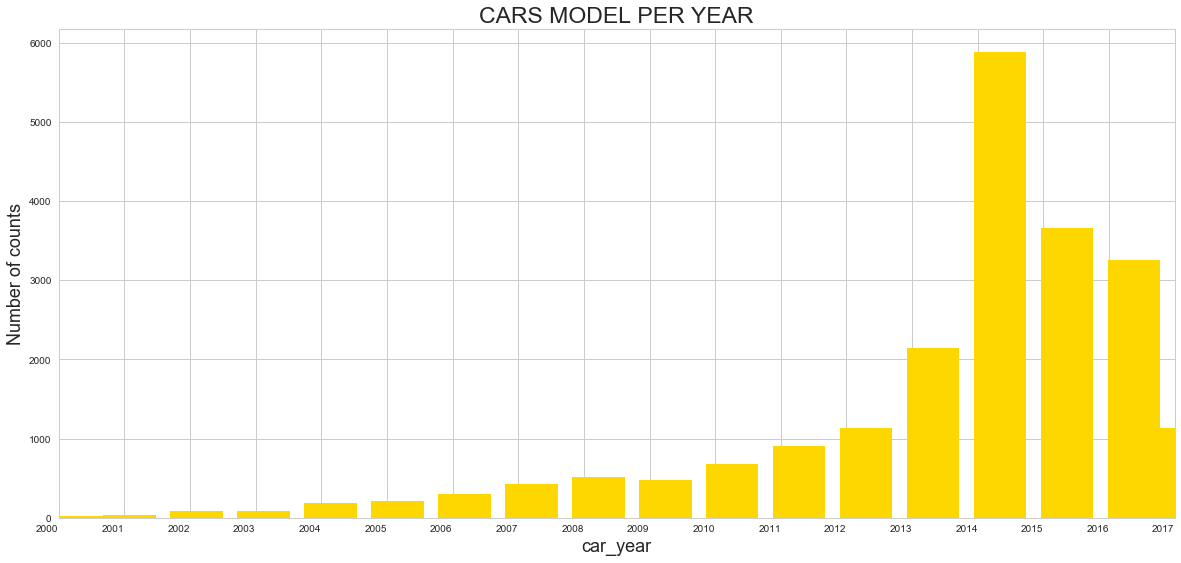

In [26]:
fig = plt.figure()
ax = fig.gca()

plt.title('CARS MODEL PER YEAR', fontsize = 23)
plt.xticks (sorted(df.car_year.unique()), horizontalalignment='right')
plt.ylabel ('Number of counts', fontsize = 18)
plt.xlabel ('Car year', fontsize = 18)
sb.distplot(df.car_year, kde=False, hist_kws={"alpha":1 ,"linewidth":3, "width":0.8, "color": "gold"})
plt.xlim(2000, 2017) # consideramos solo coches desde 2000 a 2017
plt.show()

In [27]:
# Claramente la mayoria de los coches usados proviene de los años 2013 a 2016.
# Seria util centrar el analisis en esos años

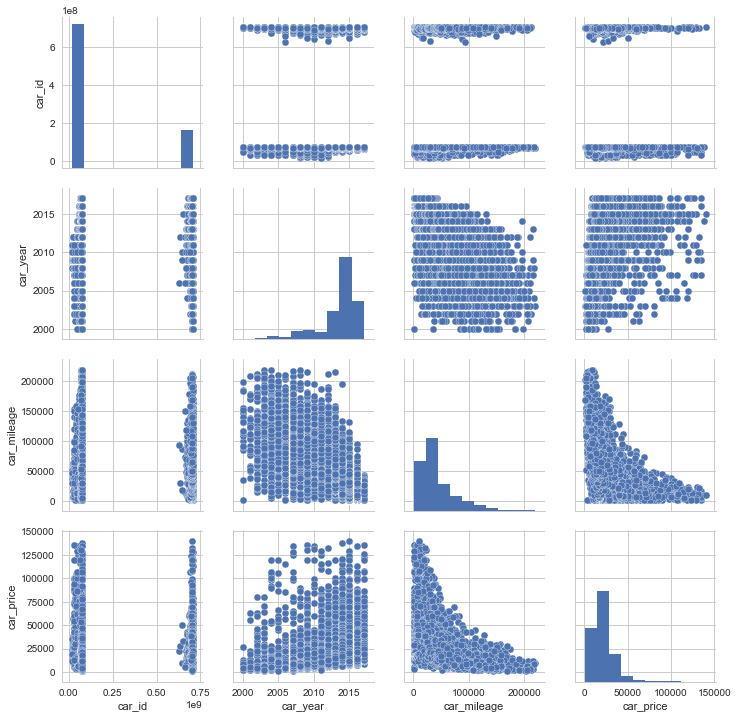

In [28]:
# Veamos ahora cual es la relacion entre las variables
sb.pairplot(df)

In [29]:
# Se observa una clara relacion entre el kilometraje y el precio. De la misma forma deberiamos observar una relacion entre el año
# el precio y el kilometraje, sin embargo no se aprecia claramente en las graficas anteriores

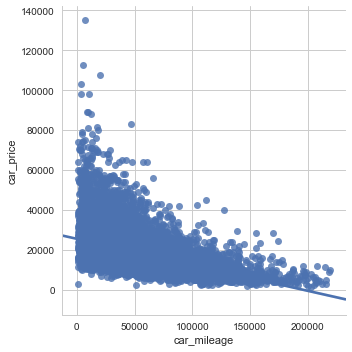

In [30]:
# Hagamoslo por separado y veamos las mismas relaciones pero para los vehiculos que tienen al menos 1000 coches registrados

sb.lmplot(x='car_mileage', y='car_price', data=dfgroup)

# Por las graficas de mas abajo, a medida que el kilometraje aumenta, disminuye el precio del coche, algo que ya intuiamos

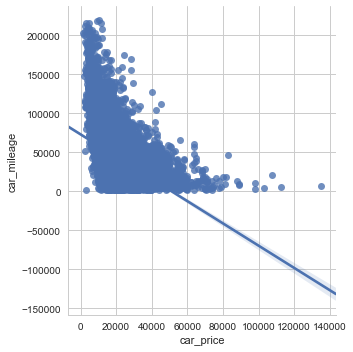

In [31]:
sb.lmplot(x='car_price', y='car_mileage', data=dfgroup)


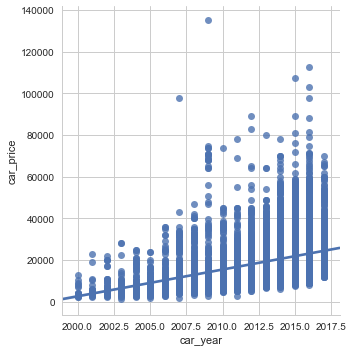

In [32]:
sb.lmplot(x='car_year', y='car_price', data=dfgroup)
# Segun la grafica de mas abajo a medida que aumenta el anyo el precio aumenta, coches mas nuevos son mas caros (normalmente, 
# salvo antiguedades)

### RELACION KILOMETRAJE Y MARCA

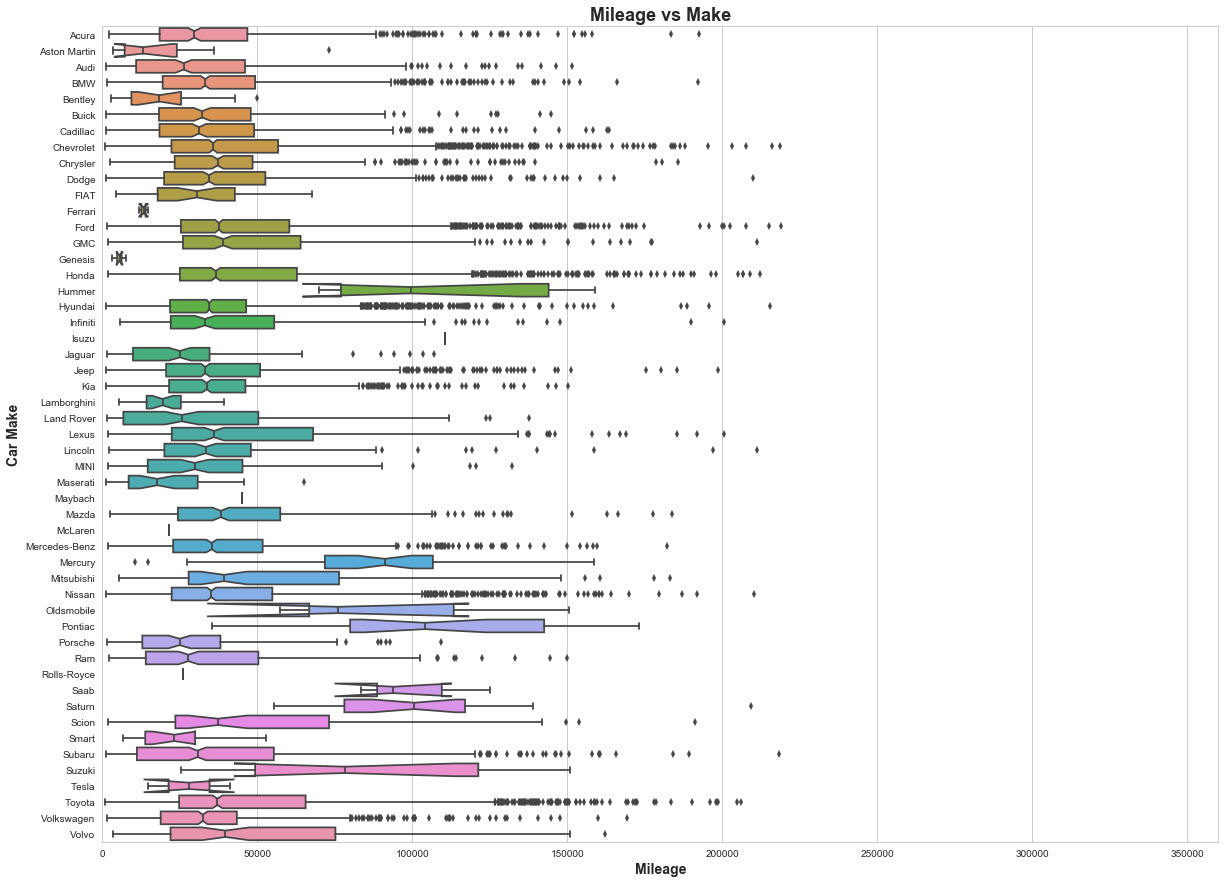

In [33]:
# Utilicemos los box plots para visulaizar por marca los outliers que aparecen en cada una de ellas

fig = plt.figure(figsize=(20, 15))
ax = fig.gca()
sb.boxplot(x='car_mileage', y='car_make',data=df,
            order=sorted(df.car_make.unique()),notch=True,orient='h')
plt.xlabel('Mileage',fontsize=14,fontweight="bold")
plt.ylabel('Car Make',fontsize=14,fontweight="bold")
plt.title('Mileage vs Make',fontsize=18,fontweight="bold")
plt.xlim(0,360000)
plt.show()

# En la grafica de mas abajo podemos observar claramente los outliers por marca, para el estudio de cada marca deebriamos acotar 
# el kilometraje segun los valores observados en el box plot
# La unica salvedad al comentario anterior serian los coches considerados antiguedades 

### KILOMETRAJE vs VOLUMEN TOTAL DE COCHES

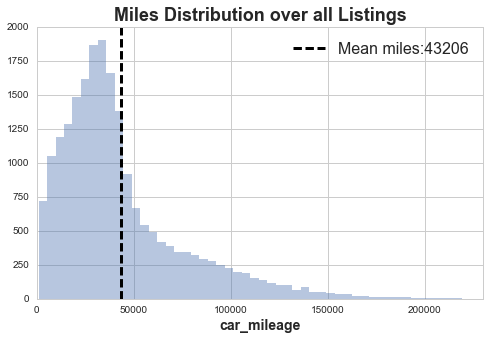

In [34]:
# veamos como se distribuye el kilometraje
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
sb.distplot(df.car_mileage,kde=False)
plt.xlabel('car_mileage',fontsize=14,fontweight="bold")
plt.axvline(df.car_mileage.mean(),lw=3,ls='dashed',
            color='black',label='Mean miles:'+'{0:.0f}'.format(np.mean(df.car_mileage)))
plt.title('Miles Distribution over all Listings',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=16)
plt.xlim(0,230000)
plt.show()

### PRECIO vs MARCA

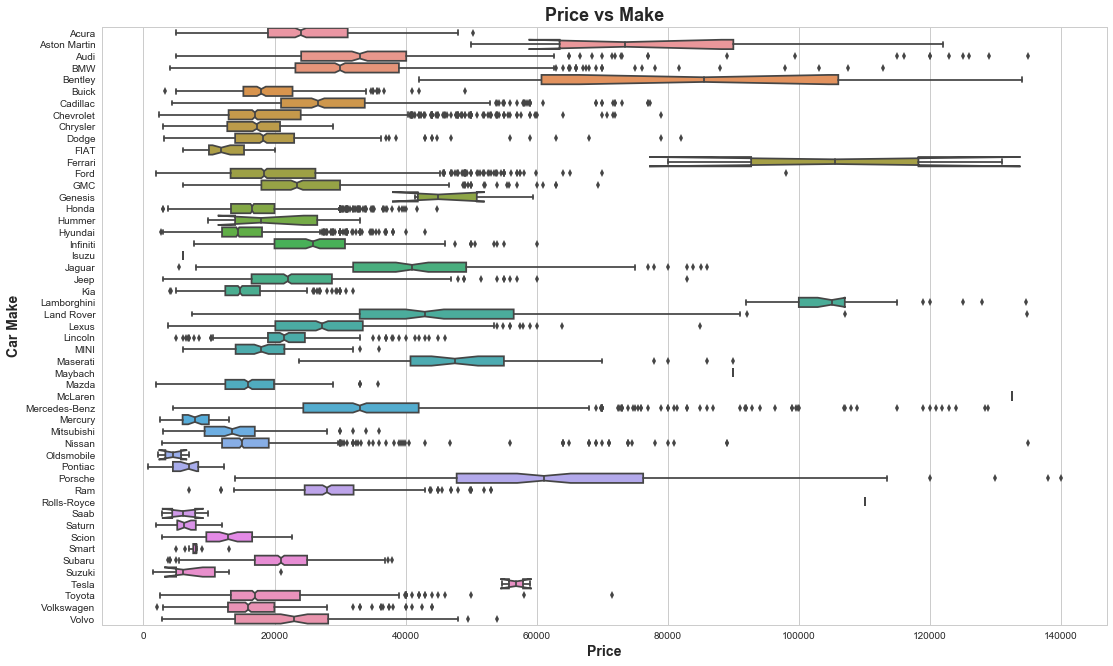

In [90]:
# De la misma forma que nel caso anterior, utilizamos box plots

fig = plt.figure(figsize=(18,11))
ax = fig.gca()
sb.boxplot(x='car_price',y='car_make',data=df[df.car_price < 150000],
            order=sorted(df.car_make.unique()),notch=True,orient='h') #consideramos un precio maximo de 150,000
plt.xlabel('Price',fontsize=14,fontweight="bold")
plt.ylabel('Car Make',fontsize=14,fontweight="bold")
plt.title('Price vs Make',fontsize=18,fontweight="bold")
plt.show()

# Cuando centremos el estudio en una marca y modelo en particular deberemos eliminar los outliers segun los valores del box plot
# de mas abajo

### DISTRIBUCION DE PRECIOS

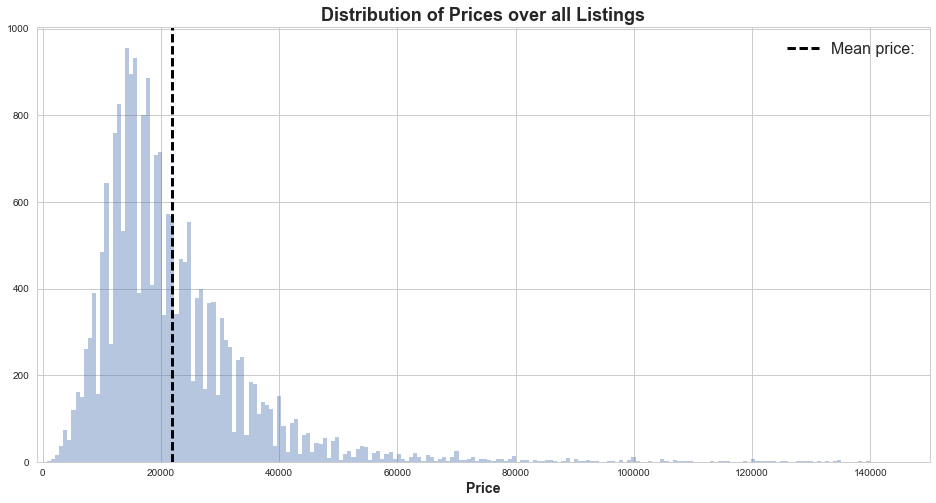

In [36]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
sb.distplot(df.car_price,kde=False,bins=200)
plt.xlabel('Price',fontsize=14,fontweight="bold")
plt.axvline(df.car_price.mean(),lw=3,ls='dashed',
            color='black',label='Mean price:'+'{0:.0s}'.format(np.mean(df)))
plt.title('Distribution of Prices over all Listings',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=16)
plt.xlim(-1000,150000)
plt.show()

### ANALISIS ESTADISTICO

En este bloque las cuestiones principales que trataremos de resolver para comprobar nuestras hipotesis son :
      * a) existe una asociacion entre los atributos anteriores y el precio del coche usado?
      * b) si existe cuan fuerte es esta asociacion/relacion?
      * c) que caracteristica es la que influye mas en el precio del coche?
      * d) puede el precio del coche ser predicho en base a esas caracteristicas
      * e) en caso que d) sea cierto, cual seria el mejor modelo?

Para poder responder a todas estas preguntas utilizaremos STATSMODEL y SCIKIT-LEARN  

Hagamos primero la siguiente suposicion:
    * kilometraje entre 100 y 180,000 millas
    * anyo de fabricacion mayor que 2000
    * precio coche menor que $140,000 

In [37]:
df = df[(df.car_mileage >=100) & (df.car_mileage < 180000) & (df.car_year > 2000) & (df.car_price < 140000)]
print 'La nueva base de datos tiene :', df.shape[1], 'columnas', 'and', df.shape[0], 'filas'

La nueva base de datos tiene : 10 columnas and 21046 filas


#### Veamos que tipo de variables tenemos

In [38]:
df.dtypes

car_id               int64
car_make            object
car_model           object
car_year             int64
car_mileage          int64
car_price            int64
car_transmission    object
car_driveTrain      object
car_vendor          object
car_location        object
dtype: object

In [39]:
# Para los analisis posteriores transformaremos algunas variables categoricas en numericas. Creamos una nueva variable llamada 
# model_code que esta relacionada con car_model. Para ello utilizamos la funcion LabelEncoder que asignara un numero a cada
# modelo de coche

model_coder = LabelEncoder()
df['model_code'] = model_coder.fit_transform(df.car_model)
model_codes = df.model_code.unique()
model_codes_idx = df.model_code.values
num_model_codes = len(model_codes)
model_names = df.car_model.unique()
df.head()

C:\Users\darog\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,model_code
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151,583
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,Automatic,4WD,Baltimore,MD 21215,2099
2,73704666,Honda,Civic-LX,2014,27784,14097,Automatic,FWD,Ellicott City,MD 21043,524
3,73566743,Jeep,Grand-Cherokee-Limited,2014,36636,27899,Automatic,4WD,Palmyra,PA 17078,1031
4,73745994,Hyundai,Santa-Fe-Sport-24L,2013,48568,18981,Automatic,AWD,Doylestown,PA 18902,1758


In [40]:
# creamos una nueva variable numerica llamada ransmission_code relacionada con car_transmission 

model_coder = LabelEncoder()
df['transmission_code'] = model_coder.fit_transform(df.car_transmission)
model_codes = df.model_code.unique()
model_codes_idx = df.model_code.values
num_model_codes = len(model_codes)
model_names = df.car_transmission.unique()
df.shape
df.head()

C:\Users\darog\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,model_code,transmission_code
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151,583,128
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,Automatic,4WD,Baltimore,MD 21215,2099,128
2,73704666,Honda,Civic-LX,2014,27784,14097,Automatic,FWD,Ellicott City,MD 21043,524,128
3,73566743,Jeep,Grand-Cherokee-Limited,2014,36636,27899,Automatic,4WD,Palmyra,PA 17078,1031,128
4,73745994,Hyundai,Santa-Fe-Sport-24L,2013,48568,18981,Automatic,AWD,Doylestown,PA 18902,1758,128


In [41]:
# creamos una nueva variable numerica llamada make_code relacionada con car_make 

model_coder = LabelEncoder()
df['make_code'] = model_coder.fit_transform(df.car_make)
model_codes = df.model_code.unique()
model_codes_idx = df.model_code.values
num_model_codes = len(model_codes)
model_names = df.car_make.unique()
df.shape
df.head()

C:\Users\darog\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,model_code,transmission_code,make_code
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151,583,128,48
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,Automatic,4WD,Baltimore,MD 21215,2099,128,21
2,73704666,Honda,Civic-LX,2014,27784,14097,Automatic,FWD,Ellicott City,MD 21043,524,128,15
3,73566743,Jeep,Grand-Cherokee-Limited,2014,36636,27899,Automatic,4WD,Palmyra,PA 17078,1031,128,21
4,73745994,Hyundai,Santa-Fe-Sport-24L,2013,48568,18981,Automatic,AWD,Doylestown,PA 18902,1758,128,17


#### Para los analisis posteriores consideramos unicamente las siguientes variables

In [42]:
data = df.select_dtypes(include=['int64']).copy()
data.head()

,car_id,car_year,car_mileage,car_price,model_code,transmission_code,make_code
0,73531922,2015,23036,13298,583,128,48
1,72354903,2012,73619,26995,2099,128,21
2,73704666,2014,27784,14097,524,128,15
3,73566743,2014,36636,27899,1031,128,21
4,73745994,2013,48568,18981,1758,128,17


In [43]:
# veamos cual es el precio medio por marca
df.groupby('car_make').car_price.mean()

car_make
Acura             25051.612648
Aston Martin      80601.500000
Audi              34972.833333
BMW               31621.927606
Bentley           84127.214286
Buick             19118.285714
Cadillac          28954.820930
Chevrolet         19793.873743
Chrysler          16799.020089
Dodge             19270.490647
FIAT              12486.384615
Ferrari          105463.500000
Ford              20554.880291
GMC               25282.904206
Genesis           47718.250000
Honda             17075.038706
Hummer            19611.888889
Hyundai           15464.127446
Infiniti          25846.624506
Isuzu              5995.000000
Jaguar            42981.966667
Jeep              22854.202520
Kia               15231.956656
Lamborghini      106796.370370
Land Rover        46608.654088
Lexus             27423.731518
Lincoln           22291.273810
MINI              17925.391304
Maserati          50852.200000
Maybach           89977.000000
Mazda             16203.900256
McLaren          132492.000000

#### Recordemos que nuestro punto de partida es asumir que el precio de un coche usado esta relacionado con el kilometraje, el anyo de fabricacion, la marca y el modelo. 
#### El objetivo es construir un modelo que sea capaz de predecir el precio de un coche usado, para ello consideramos lo siguiente:

* Variables predictoras (X): car_mileage, car_year, car_make

* Variable target (Y): car_price

In [44]:
# Seleccionamos subsets conteniendo una marca concreta y veamos que pruebas estadisticas podemos aplicar

data = df[df.car_make.isin(['Ford'])]
data.head()

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,model_code,transmission_code,make_code
21,73084835,Ford,F150-XL,2014,73564,25085,Automatic,RWD,North Palm Beach,FL 33408,809,128,12
23,73727070,Ford,F350-Super-Duty-SRW-Lariat,2016,23901,54999,Automatic,4WD,Prince Frederick,MD 20678,823,128,12
24,73186902,Ford,F250-Super-Duty-XL,2016,38466,39999,Automatic,4WD,Laurel,MD 20707,815,128,12
26,72928335,Ford,Escape-SE,2015,24477,16998,Automatic,FWD,Fort Myers,FL 33966,755,128,12
30,72412728,Ford,Escape-SE,2014,42694,16998,Automatic,AWD,King Of Prussia,PA 19406,755,128,12


In [45]:
data.shape

(2197, 13)

In [46]:
# Definamos ahora un subset solo conteniendo los modelos Escape-SE de Ford
Ford_Escape = data[data.model_code== 755]
Ford_Escape.head()

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,model_code,transmission_code,make_code
26,72928335,Ford,Escape-SE,2015,24477,16998,Automatic,FWD,Fort Myers,FL 33966,755,128,12
30,72412728,Ford,Escape-SE,2014,42694,16998,Automatic,AWD,King Of Prussia,PA 19406,755,128,12
45,73619027,Ford,Escape-SE,2014,31246,15998,Automatic,FWD,King Of Prussia,PA 19406,755,128,12
151,73069500,Ford,Escape-SE,2014,19581,18998,6-Speed Automatic,AWD,Cherry Hill,NJ 08034,755,54,12
249,73713822,Ford,Escape-SE,2014,31482,18991,Shiftable Automatic,AWD,Lititz,PA 17543,755,157,12


In [47]:
Ford_Escape.shape

(155, 13)

In [48]:
# Veamos la matriz de correlacion entre las variables para el subset de Ford Escape-SE de forma que podamos ver como de 
# corelacionadas estan las variables 

Ford_Escape[['car_year', 'car_mileage', 'car_price','transmission_code']].corr()

,car_year,car_mileage,car_price,transmission_code
car_year,1.000000,-0.282980,0.335559,0.074373
car_mileage,-0.282980,1.000000,-0.596267,-0.120717
car_price,0.335559,-0.596267,1.000000,0.026302
transmission_code,0.074373,-0.120717,0.026302,1.000000


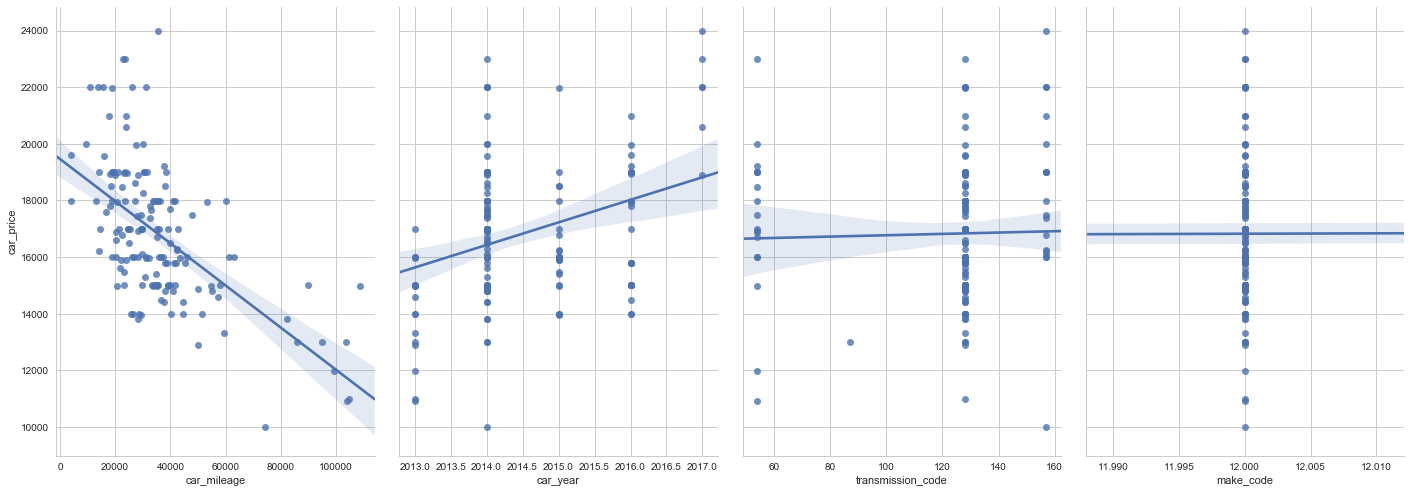

In [49]:
# Veamos la relacion entre variables para el modelo elegido a traves de scatter plots
sb.pairplot(Ford_Escape, x_vars=['car_mileage', 'car_year','transmission_code', 'make_code',]\
             , y_vars = 'car_price', size = 7, aspect =0.7, kind = 'reg')

### Conclusiones
De la tabla anterior podemos observar que el coeficiente de correlacion entre el 
precio del coche y el kilometraje es negativo -0.59, no es suficentemente fuerte aunque se aprecia la tendencia y la relacion existente.

El coeficiente de correlacion entre anyo de fabricacion y precio es positivo 0.33
pero no es tampoco suficentemente fuerte, es un valor muy bajo.

De todo lo observado podemos decir que las correlaciones son muy debiles y que a pesar
de que el precio esta relacionado con kilometraje y anyo de fabricacion, la relacion no es 
suficientemente fuerte. A traves del scatter plot podemos visualmente confirmar esto tambien.

In [91]:
# Veamos el caso para Toyota

data = df[df.car_make.isin(['Toyota'])]
data.head()

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,model_code,transmission_code,make_code
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151,583,128,48
32,71462633,Toyota,Camry-LE,2007,146419,5977,Automatic,FWD,Milford,DE 19963,452,128,48
38,73462145,Toyota,4runner-SR5,2016,38698,28695,Automatic,4WD,Chantilly,VA 20151,106,128,48
56,73704173,Toyota,Corolla-L,2016,41869,11999,VARIABLE,FWD,Lake Worth,FL 33461,582,164,48
60,73437046,Toyota,Highlander,2005,125742,7163,Automatic,FWD,Delray Beach,FL 33483,1062,128,48


In [52]:
# Definamos ahora un subset solo conteniendo los modelos RAV4 de Toyota

Toyota_RAV4 = data[data.model_code== 1579]
Toyota_RAV4.head()

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,model_code,transmission_code,make_code
16932,696901992,Toyota,RAV4,2011,126635,12795,Automatic,FWD,Arlington,Arlington,1579,128,48
16963,701302396,Toyota,RAV4,2015,14971,22984,Automatic,FWD,Arlington,Arlington,1579,128,48
17062,705196476,Toyota,RAV4,2005,126729,7777,5-Speed Manual,AWD,Arlington,Arlington,1579,35,48
17074,702624448,Toyota,RAV4,2017,9697,20898,Automatic,FWD,Arlington,Arlington,1579,128,48
17082,703532590,Toyota,RAV4,2013,22483,19266,6-Speed Automatic,AWD,Arlington,Arlington,1579,54,48


In [53]:
Toyota_RAV4.shape

(73, 13)

In [54]:
# Veamos la matriz de correlacion entre las variables para el subset de Toyota RAV4 de forma que podamos ver como de 
# corelacionadas estan las variables 

Toyota_RAV4[['car_year', 'car_mileage', 'car_price','transmission_code']].corr()

,car_year,car_mileage,car_price,transmission_code
car_year,1.000000,-0.636140,0.679725,0.117990
car_mileage,-0.636140,1.000000,-0.718136,-0.113720
car_price,0.679725,-0.718136,1.000000,-0.087293
transmission_code,0.117990,-0.113720,-0.087293,1.000000


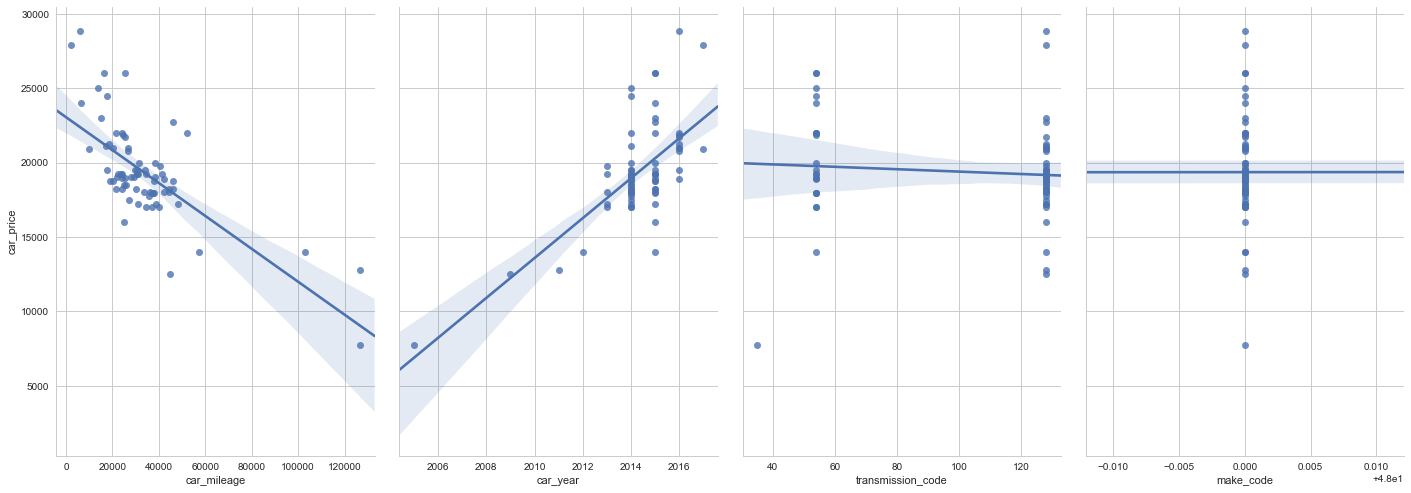

In [55]:
# Veamos la relacion entre variables para el modelo elegido a traves de scatter plots
sb.pairplot(Toyota_RAV4, x_vars=['car_mileage', 'car_year','transmission_code', 'make_code',]\
             , y_vars = 'car_price', size = 7, aspect =0.7, kind = 'reg')

### Conclusiones 
Para este tabla de correlacion observamos que la relacion entre precio y anyo de fabricacion es mas fuerte pero seguimos sin poder concluir en una correlacion fuerte. En este caso, sospecho que hemos obtenido mejores valores porque hay un numero menor de muestras que en el caso de Ford. 

In [56]:
# En lugar de elegir solo una marca y un modelo podemos incluir varios modelos y observar las relaciones. Los resultados estaran
# afectados por los diferentes valores de las marcas, es decir, BMW es mas caro que Ford. Utilizando una base de datos donde se
# incluyan ambos podemos distorsionar el resultado, no obstante, veamos los resultados

In [57]:
# Seleccionemos un subset con las siguentes marcas incluidas 
data = df[df.car_make.isin(['Hyundai', 'Ford','Toyota', 'Honda', 'Nissan'])] 
data.head(3)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,model_code,transmission_code,make_code
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151,583,128,48
2,73704666,Honda,Civic-LX,2014,27784,14097,Automatic,FWD,Ellicott City,MD 21043,524,128,15
4,73745994,Hyundai,Santa-Fe-Sport-24L,2013,48568,18981,Automatic,AWD,Doylestown,PA 18902,1758,128,17


In [58]:
data[['car_year', 'car_mileage', 'car_price','model_code','transmission_code']].corr()

,car_year,car_mileage,car_price,model_code,transmission_code
car_year,1.000000,-0.760333,0.397658,0.014466,0.262088
car_mileage,-0.760333,1.000000,-0.439982,-0.018649,-0.226487
car_price,0.397658,-0.439982,1.000000,0.039284,0.055016
model_code,0.014466,-0.018649,0.039284,1.000000,0.040966
transmission_code,0.262088,-0.226487,0.055016,0.040966,1.000000


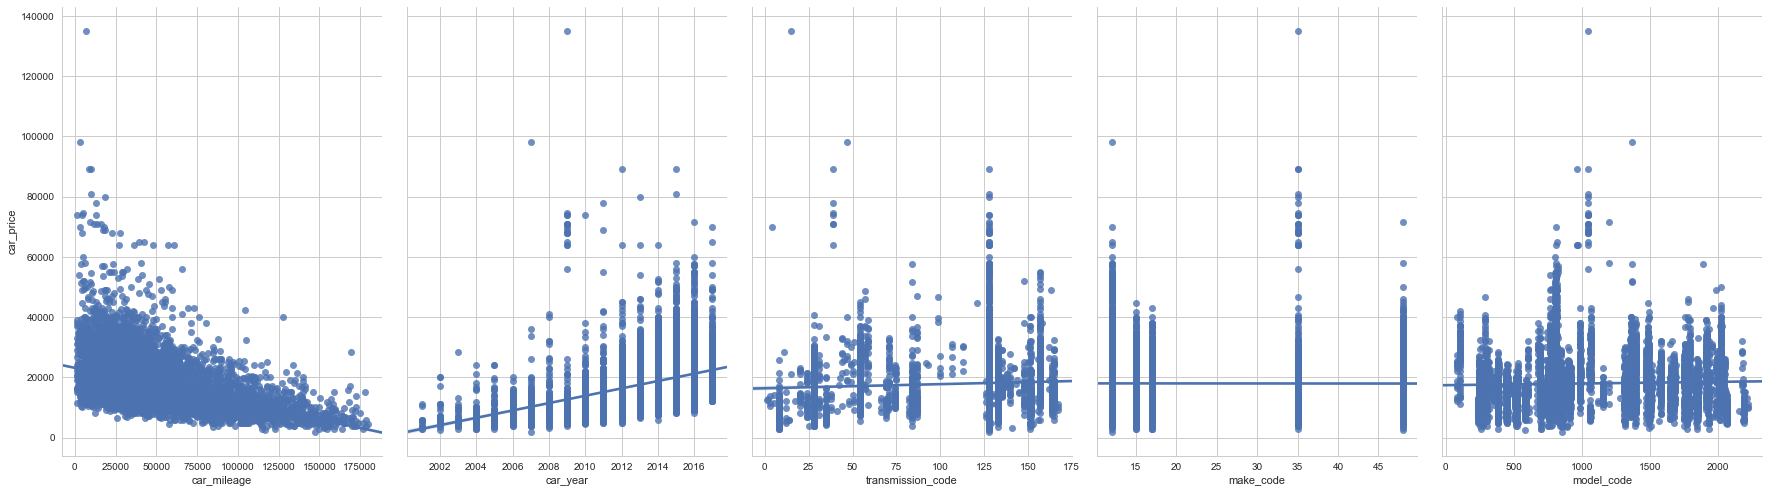

In [59]:
sb.pairplot(data, x_vars=['car_mileage', 'car_year','transmission_code', 'make_code','model_code']\
             , y_vars = 'car_price', size = 7, aspect =0.7, kind = 'reg')

### Conclusiones
Observamos las mismas tendencias, a pesar de tener en el dataset coches de distintas marcas y modelos.

# Regresion Lineal Simple

Como continuacion de los analisis estadisticos anteriores, es importante analizar la regresion lineal simple entre el precio del coche y el kilometraje pues parece que es la que mas afecta al precio final del coche.
La regresion lineal predice la variable considerada target (Y) utilizando una sola variable a partir de la siguiente expresion:

Y = βo + β1 X

Donde,

Y = variable dependiente o predicha; X = variable independiente o predictora, βo = interseccion β1 = coeficiente para x

Los valores βo y β1 son desconocidos y se estiman por la regresion de minimos cuadrados, es decir, tratamos de encontrasr la linea matematicamente hablando que minimiza la suma del error de los cuadrados. Para ello utilizaremos la funcion Statsmodels, nuestra ecuacion quedara asi:

car_price (Y) = βo+ β1*car_mileage (X)

In [62]:
# continuamos usando el subset con las siguientes marcas: Hyundai', 'Ford','Toyota', 'Honda', 'Nissan'

import statsmodels.formula.api as smf

# veamos el valor de la interseccion, coeficiente βo  
lm = smf.ols(formula='car_price ~ car_mileage', data=data).fit()  

# veamos los coeficientes
lm.params

Intercept      23140.916290
car_mileage       -0.114011
dtype: float64

In [84]:
# Valor de R-cuadrado que nos dara la bondad del ajuste
lm.rsquared

0.2122793228212263

###### La ecuacion de la regresion lineal simple queda como sigue:
###### car_price  = 23140 - 0.114011 car_mileage 

In [63]:
# probemos ahora con el subset de datos solo para Ford Escape

data = df[df.car_make.isin(['Ford'])]
Ford_Escape = data[data.model_code== 755]

import statsmodels.formula.api as smf

# veamos el valor de la interseccion, coeficiente βo  
lm = smf.ols(formula='car_price ~ car_mileage', data=Ford_Escape).fit()   

# veamos los coeficientes
lm.params

Intercept      19461.120012
car_mileage       -0.074401
dtype: float64

###### La ecuacion de la regresion lineal simple queda como sigue:
###### car_price  = 19461 - 0.074401 car_mileage 

In [66]:
Ford_Escape.head()

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,model_code,transmission_code,make_code
26,72928335,Ford,Escape-SE,2015,24477,16998,Automatic,FWD,Fort Myers,FL 33966,755,128,12
30,72412728,Ford,Escape-SE,2014,42694,16998,Automatic,AWD,King Of Prussia,PA 19406,755,128,12
45,73619027,Ford,Escape-SE,2014,31246,15998,Automatic,FWD,King Of Prussia,PA 19406,755,128,12
151,73069500,Ford,Escape-SE,2014,19581,18998,6-Speed Automatic,AWD,Cherry Hill,NJ 08034,755,54,12
249,73713822,Ford,Escape-SE,2014,31482,18991,Shiftable Automatic,AWD,Lititz,PA 17543,755,157,12


## Conclusiones 

### Calculemos R-cuadrado para el modelo lineal simple

In [75]:
lm.rsquared

0.35553478338926403

###### El R Cuadrado se define como la proporción de la varianza total de la variable explicada por la regresión. R-cuadrado, refleja
###### la bondad del ajuste de un modelo a la variable que pretender explicar. R Cuadrado oscila entre 0 y 1, cuanto más cerca de 1 se
###### sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. Cuanto más cerca de cero, menos
###### ajustado estará el modelo y, por tanto, menos fiable será.

###### A la vista de los valores obtenidos para el conjunto de datos formado por varias marcas: Hyundai', 'Ford','Toyota', 'Honda', 'Nissan'  
###### podemos afirmar que el modelo de regresion lineal simple no es el mas adecuado para nuestra base de datos, ambos valores son muy bajos
###### mas proximos a 0 que a 1

# Regresion Lineal Multiple

#### Y = βo + β1 X1 + β2 X2 + ....
#### Ahora anyadimos mas variables (car year, car model, car transmission para ver si el modelo ajusta mejor

In [85]:
# creamos un modelo con 3 variables para el conjunto de datos formado por varios marcas: Hyundai', 'Ford','Toyota', 'Honda',
# 'Nissan' 
lm_multiple = smf.ols(formula='car_price ~car_mileage + model_code + car_year', data=data).fit()

# veamos los coeficientes
lm_multiple.params

Intercept     -1.299228e+06
car_mileage   -9.970908e-02
model_code    -1.957642e+00
car_year       6.586933e+02
dtype: float64

In [87]:
lm_multiple.rsquared

0.2122793228212263

###### De nuevo los valores de la bondad del ajuste del modelo son mas proximos a cero que a 1, el modelo de regresion multiple
###### tampoco predice bien nuestro problema